数据集：Trending YouTube Video Statistics / CAvideos.csv, DEvideos.csv, FRvideos.csv, GBvideos.csv, INvideos.csv, USvideos.csv（包含16列81898行的YouTube加拿大、德国、法国、英国、印度、美国地区视频趋势统计）

属性：

video_id: 视频ID

trending_date: 视频上榜日期

title: 视频标题

channel_title: 所属频道标题

category_id: 分数分类ID

publish_time: 发布时间

tags: 标签

views: 观看次数

likes: 点赞次数

dislikes: 被踩次数

comment_count: 评论数

thumbnail_link: 缩略图链接

comments_disabled: 评论是否关闭

ratings_disabled: 评分是否关闭

video_error_or_removed: 视频是否出错或被删除

description: 视频描述


In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
%matplotlib inline

Nominal(dataframe)是处理标称属性的函数

处理标称属性，给出每个可能聚会的频数。

In [2]:
def Nominal(df):
    res_dic = {}
    col2 = df.trending_date.unique()    #trending_date
    col4 = df.channel_title.unique()    #channel_title
    col5 = df.category_id.unique()    #category_id
    col6 = df.publish_time.unique()    #publish_time
    col13 = df.comments_disabled.unique()    #comments_disabled
    col14 = df.ratings_disabled.unique()    #ratings_disabled
    col15 = df.video_error_or_removed.unique()    #video_error_or_removed
    
    
    res_dic["trending_date"] = {}
    res_dic["channel_title"] = {}
    res_dic["category_id"] = {}
    res_dic["publish_time"] = {}
    res_dic["comments_disabled"] = {}
    res_dic["ratings_disabled"] = {}
    res_dic["video_error_or_removed"] = {}
    
    for entity in col2:
        res_dic["trending_date"][entity] = list(df.trending_date).count(entity)
    for entity in col4:
        res_dic["channel_title"][entity] = list(df.channel_title).count(entity)
    for entity in col5:
        res_dic["category_id"][entity] = list(df.category_id).count(entity)
    for entity in col6:
        res_dic["publish_time"][entity] = list(df.publish_time).count(entity)
    for entity in col13:
        res_dic["comments_disabled"][entity] = list(df.comments_disabled).count(entity)
    for entity in col14:
        res_dic["ratings_disabled"][entity] = list(df.ratings_disabled).count(entity)
    for entity in col15:
        res_dic["video_error_or_removed"][entity] = list(df.video_error_or_removed).count(entity)
    
    return res_dic

Numeric(dataframe)是处理数值属性的函数

处理数值属性，给出5数概括及缺失值的个数

并对数值属性进行数据可视化，使用直方图、盒图等检查数据分布及离群点

In [3]:
def Numeric(df):
    res_dic = {}
    describe = df.describe()
    res_dic["col8"] = {}
    res_dic["col9"] = {}
    res_dic["col10"] = {}
    res_dic["col11"] = {}
    print(describe)
    
    res_dic["col8"]["Max"] = describe.views[7]
    res_dic["col8"]["Min"] = describe.views[3]
    res_dic["col8"]["Mean"] = describe.views[1]
    res_dic["col8"]["Mid"] = describe.views[5]
    res_dic["col8"]["25"] = describe.views[4]
    res_dic["col8"]["75"] = describe.views[6]
    res_dic["col8"]["Nan"] = df.views.isna().sum()
    
    res_dic["col9"]["Max"] = describe.likes[7]
    res_dic["col9"]["Min"] = describe.likes[3]
    res_dic["col9"]["Mean"] = describe.likes[1]
    res_dic["col9"]["Mid"] = describe.likes[5]
    res_dic["col9"]["25"] = describe.likes[4]
    res_dic["col9"]["75"] = describe.likes[6]
    res_dic["col9"]["Nan"] = df.likes.isna().sum()

    res_dic["col10"]["Max"] = describe.dislikes[7]
    res_dic["col10"]["Min"] = describe.dislikes[3]
    res_dic["col10"]["Mean"] = describe.dislikes[1]
    res_dic["col10"]["Mid"] = describe.dislikes[5]
    res_dic["col10"]["25"] = describe.dislikes[4]
    res_dic["col10"]["75"] = describe.dislikes[6]
    res_dic["col10"]["Nan"] = df.dislikes.isna().sum()

    res_dic["col11"]["Max"] = describe.comment_count[7]
    res_dic["col11"]["Min"] = describe.comment_count[3]
    res_dic["col11"]["Mean"] = describe.comment_count[1]
    res_dic["col11"]["Mid"] = describe.comment_count[5]
    res_dic["col11"]["25"] = describe.comment_count[4]
    res_dic["col11"]["75"] = describe.comment_count[6]
    res_dic["col11"]["Nan"] = df.comment_count.isna().sum()

    print(res_dic)
    
    
    #hist
    plt.hist(df["views"], bins=100)
    plt.xlabel("Interval")
    plt.ylabel("Frequency")
    plt.title("views - Frequency distribution histogram")
    plt.show()

    plt.hist(df["likes"], bins=100)
    plt.xlabel("Interval")
    plt.ylabel("Frequency")
    plt.title("likes - Frequency distribution histogram")
    plt.show()
    
    plt.hist(df["dislikes"], bins=100)
    plt.xlabel("Interval")
    plt.ylabel("Frequency")
    plt.title("dislikes - Frequency distribution histogram")
    plt.show()
    
    plt.hist(df["comment_count"], bins=100)
    plt.xlabel("Interval")
    plt.ylabel("Frequency")
    plt.title("comment_count - Frequency distribution histogram")
    plt.show()
    
    
    #boxplot
    plt.boxplot(df["views"])
    plt.ylabel("views")
    plt.show()
    
    plt.boxplot(df["likes"])
    plt.ylabel("likes")
    plt.show()
    
    plt.boxplot(df["dislikes"])
    plt.ylabel("dislikes")
    plt.show()
    
    plt.boxplot(df["comment_count"])
    plt.ylabel("comment_count")
    plt.show()
     

对于数值属性，将缺失部分剔除进行处理:

In [4]:
def drop_nan_process(df):
    df = df.dropna(subset=["views"])
    df = df.dropna(subset=["likes"])
    df = df.dropna(subset=["dislikes"])
    df = df.dropna(subset=["comment_count"])
    Numeric(df)

用最高频率值来填补缺失值:

In [5]:
def high_feq_process(df):
    Ndf = pd.DataFrame(df, columns=["views", "likes", "dislikes", "comment_count"])
    feq_views = Ndf["views"].value_counts()
    feq_likes = Ndf["likes"].value_counts()
    feq_dislikes = Ndf["dislikes"].value_counts()
    feq_comment_count = Ndf["comment_count"].value_counts()
    fill_value = {
        "views": list(dict(feq_views))[0],
        "likes": list(dict(feq_likes))[0],
        "dislikes": list(dict(feq_dislikes))[0],
        "comment_count": list(dict(feq_comment_count))[0],
    }
    Ndf = Ndf.fillna(value=fill_value)
    Numeric(Ndf)

通过属性的相关关系来填补缺失值:

In [6]:
def relation_process(df):
    Ndf = pd.DataFrame(df, columns=["views", "likes", "dislikes", "comment_count"])
    Ndf.interpolate(method="values")
    Numeric(Ndf)

通过数据对象之间的相似性来填补缺失值:

In [7]:
def similarity_process(df, k_num):
    OriNdf = pd.DataFrame(df, columns=["views", "likes", "dislikes", "comment_count"])
    Ndf = pd.DataFrame(df, columns=["views", "likes", "dislikes", "comment_count"])
    Ndf = Ndf.dropna(axis=0, how="any")
    clf = KNeighborsRegressor(n_neighbors=k_num, weights="distance")
    clf.fit(np.array(list(Ndf["views"])).reshape(-1, 1), np.array(list(Ndf["likes"])).reshape(-1, 1))
    for i in range(0, len(OriNdf)):
        if pd.isna(OriNdf.iloc[i]["likes"]):
            new_value = clf.predict(np.array([OriNdf.iloc[i]["views"]]).reshape(-1, 1))
            OriNdf.at[i, "likes"] = new_value

    clf.fit(np.array(list(Ndf["likes"])).reshape(-1, 1), np.array(list(Ndf["views"])).reshape(-1, 1))
    for i in range(0, len(OriNdf)):
        if pd.isna(OriNdf.iloc[i]["views"]):
            new_value = clf.predict(np.array([OriNdf.iloc[i]["likes"]]).reshape(-1, 1))
            OriNdf.at[i, "views"] = new_value
            
    clf.fit(np.array(list(Ndf["comment_count"])).reshape(-1, 1), np.array(list(Ndf["dislikes"])).reshape(-1, 1))
    for i in range(0, len(OriNdf)):
        if pd.isna(OriNdf.iloc[i]["dislikes"]):
            new_value = clf.predict(np.array([OriNdf.iloc[i]["comment_count"]]).reshape(-1, 1))
            OriNdf.at[i, "dislikes"] = new_value
            
    clf.fit(np.array(list(Ndf["dislikes"])).reshape(-1, 1), np.array(list(Ndf["comment_count"])).reshape(-1, 1))
    for i in range(0, len(OriNdf)):
        if pd.isna(OriNdf.iloc[i]["comment_count"]):
            new_value = clf.predict(np.array([OriNdf.iloc[i]["dislikes"]]).reshape(-1, 1))
            OriNdf.at[i, "comment_count"] = new_value


    Numeric(OriNdf)

开始进行分析：

In [8]:
file = "youtube-new/USvideos.csv"
df = pd.read_csv(file)
countries = ["CA", "DE", "FR", "GB", "IN", "US"]
for country in countries:
    print("country:", country)
    df = pd.read_csv("youtube-new/{}videos.csv".format(country))
    columnsList = list(df)
    order = ["video_id", "trending_date", "title", "channel_title", "category_id", "publish_time", "tags", "views", "likes", "dislikes", "comment_count", "thumbnail_link", "comments_disabled", "ratings_disabled", "video_error_or_removed", "description"]
    tmpdf = df[order]
    df = df.append(tmpdf, ignore_index=True)
Nominal(df)

country: CA
country: DE
country: FR
country: GB
country: IN
country: US


{'trending_date': {'17.14.11': 400,
  '17.15.11': 400,
  '17.16.11': 400,
  '17.17.11': 400,
  '17.18.11': 400,
  '17.19.11': 400,
  '17.20.11': 400,
  '17.21.11': 400,
  '17.22.11': 400,
  '17.23.11': 400,
  '17.24.11': 400,
  '17.25.11': 400,
  '17.26.11': 400,
  '17.27.11': 400,
  '17.28.11': 400,
  '17.29.11': 400,
  '17.30.11': 400,
  '17.01.12': 400,
  '17.02.12': 400,
  '17.03.12': 400,
  '17.04.12': 400,
  '17.05.12': 400,
  '17.06.12': 400,
  '17.07.12': 400,
  '17.08.12': 400,
  '17.09.12': 400,
  '17.10.12': 400,
  '17.11.12': 400,
  '17.12.12': 400,
  '17.13.12': 400,
  '17.14.12': 400,
  '17.15.12': 400,
  '17.16.12': 400,
  '17.17.12': 400,
  '17.18.12': 400,
  '17.19.12': 400,
  '17.20.12': 400,
  '17.21.12': 400,
  '17.22.12': 400,
  '17.23.12': 400,
  '17.24.12': 400,
  '17.25.12': 400,
  '17.26.12': 400,
  '17.27.12': 400,
  '17.28.12': 400,
  '17.29.12': 400,
  '17.30.12': 400,
  '17.31.12': 400,
  '18.01.01': 400,
  '18.02.01': 400,
  '18.03.01': 400,
  '18.04.01': 

              views         likes      dislikes  comment_count
count  8.189800e+04  8.189800e+04  8.189800e+04   8.189800e+04
mean   2.360785e+06  7.426670e+04  3.711401e+03   8.446804e+03
std    7.394069e+06  2.288839e+05  2.902953e+04   3.743026e+04
min    5.490000e+02  0.000000e+00  0.000000e+00   0.000000e+00
25%    2.423290e+05  5.424000e+03  2.020000e+02   6.140000e+02
50%    6.818610e+05  1.809100e+04  6.310000e+02   1.856000e+03
75%    1.823157e+06  5.541700e+04  1.938000e+03   5.755000e+03
max    2.252119e+08  5.613827e+06  1.674420e+06   1.361580e+06
{'col8': {'Max': 225211923.0, 'Min': 549.0, 'Mean': 2360784.6382573447, 'Mid': 681861.0, '25': 242329.0, '75': 1823157.0, 'Nan': 0}, 'col9': {'Max': 5613827.0, 'Min': 0.0, 'Mean': 74266.7024347359, 'Mid': 18091.0, '25': 5424.0, '75': 55417.0, 'Nan': 0}, 'col10': {'Max': 1674420.0, 'Min': 0.0, 'Mean': 3711.400888910596, 'Mid': 631.0, '25': 202.0, '75': 1938.0, 'Nan': 0}, 'col11': {'Max': 1361580.0, 'Min': 0.0, 'Mean': 8446.8036826

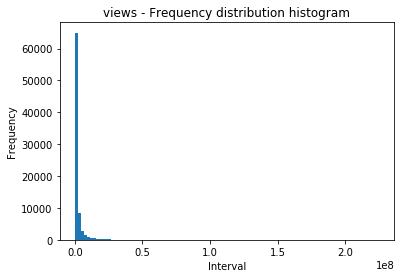

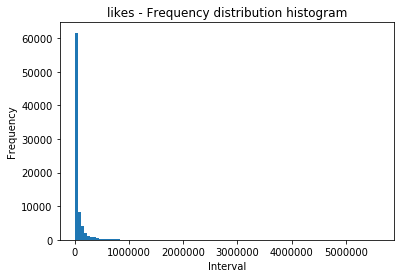

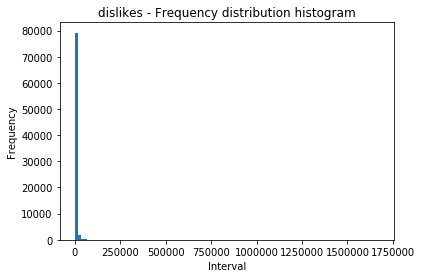

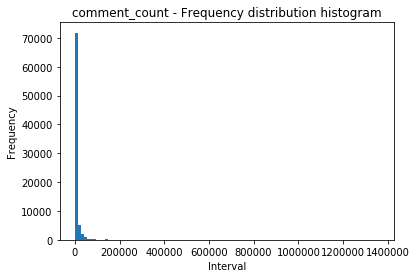

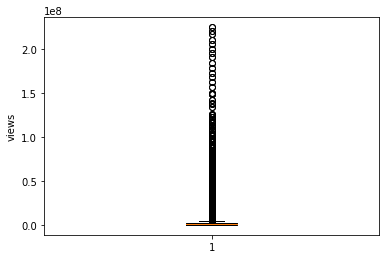

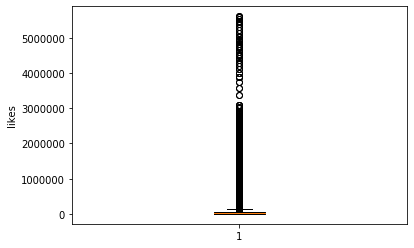

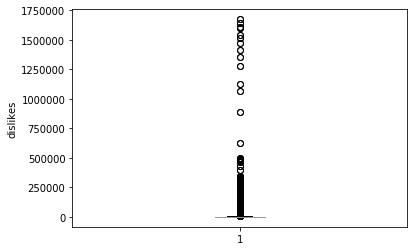

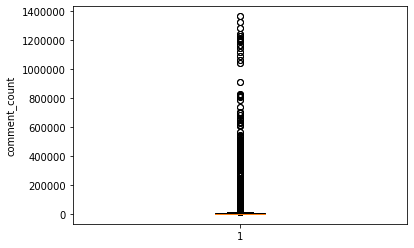

In [9]:
Numeric(pd.DataFrame(df, columns=["views", "likes", "dislikes", "comment_count"]))

通过对数值属性进行数据可视化分析，可以得出以下结论，views, likes, dislikes, comment_count属性明显不符合正态分布，4种属性的分布显示出绝大部分视频都只有少量人关注，只是少部分的视频是最受大众关注的。

通过对缺失值的统计,可发现views, likes, dislikes, comment_count4种数值属性都没有缺失值，数据较为完整。

              views         likes      dislikes  comment_count
count  8.189800e+04  8.189800e+04  8.189800e+04   8.189800e+04
mean   2.360785e+06  7.426670e+04  3.711401e+03   8.446804e+03
std    7.394069e+06  2.288839e+05  2.902953e+04   3.743026e+04
min    5.490000e+02  0.000000e+00  0.000000e+00   0.000000e+00
25%    2.423290e+05  5.424000e+03  2.020000e+02   6.140000e+02
50%    6.818610e+05  1.809100e+04  6.310000e+02   1.856000e+03
75%    1.823157e+06  5.541700e+04  1.938000e+03   5.755000e+03
max    2.252119e+08  5.613827e+06  1.674420e+06   1.361580e+06
{'col8': {'Max': 225211923.0, 'Min': 549.0, 'Mean': 2360784.6382573447, 'Mid': 681861.0, '25': 242329.0, '75': 1823157.0, 'Nan': 0}, 'col9': {'Max': 5613827.0, 'Min': 0.0, 'Mean': 74266.7024347359, 'Mid': 18091.0, '25': 5424.0, '75': 55417.0, 'Nan': 0}, 'col10': {'Max': 1674420.0, 'Min': 0.0, 'Mean': 3711.400888910596, 'Mid': 631.0, '25': 202.0, '75': 1938.0, 'Nan': 0}, 'col11': {'Max': 1361580.0, 'Min': 0.0, 'Mean': 8446.8036826

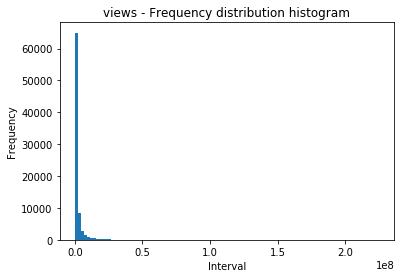

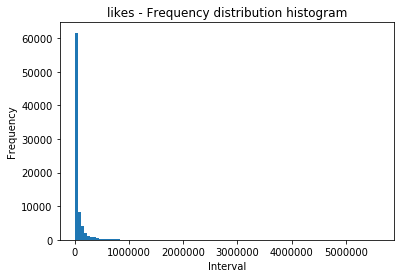

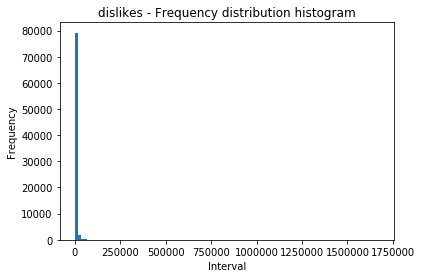

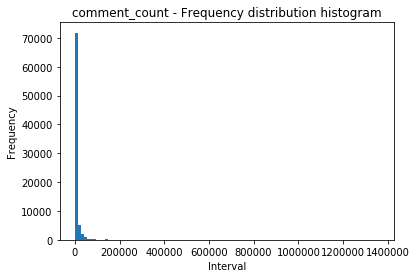

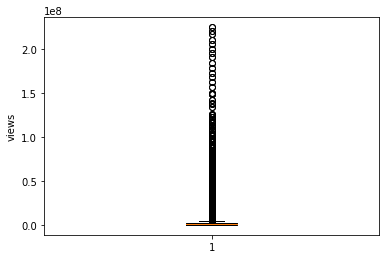

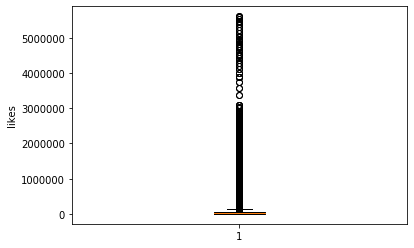

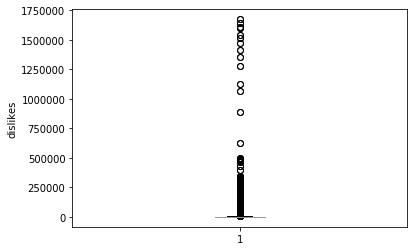

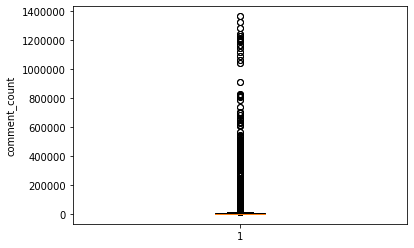

In [10]:
drop_nan_process(pd.DataFrame(df, columns=["views", "likes", "dislikes", "comment_count"]))

              views         likes      dislikes  comment_count
count  8.189800e+04  8.189800e+04  8.189800e+04   8.189800e+04
mean   2.360785e+06  7.426670e+04  3.711401e+03   8.446804e+03
std    7.394069e+06  2.288839e+05  2.902953e+04   3.743026e+04
min    5.490000e+02  0.000000e+00  0.000000e+00   0.000000e+00
25%    2.423290e+05  5.424000e+03  2.020000e+02   6.140000e+02
50%    6.818610e+05  1.809100e+04  6.310000e+02   1.856000e+03
75%    1.823157e+06  5.541700e+04  1.938000e+03   5.755000e+03
max    2.252119e+08  5.613827e+06  1.674420e+06   1.361580e+06
{'col8': {'Max': 225211923.0, 'Min': 549.0, 'Mean': 2360784.6382573447, 'Mid': 681861.0, '25': 242329.0, '75': 1823157.0, 'Nan': 0}, 'col9': {'Max': 5613827.0, 'Min': 0.0, 'Mean': 74266.7024347359, 'Mid': 18091.0, '25': 5424.0, '75': 55417.0, 'Nan': 0}, 'col10': {'Max': 1674420.0, 'Min': 0.0, 'Mean': 3711.400888910596, 'Mid': 631.0, '25': 202.0, '75': 1938.0, 'Nan': 0}, 'col11': {'Max': 1361580.0, 'Min': 0.0, 'Mean': 8446.8036826

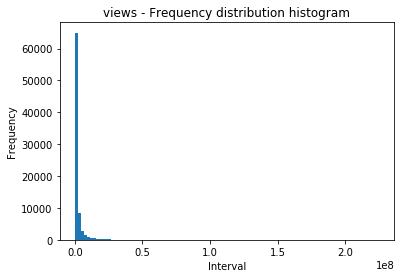

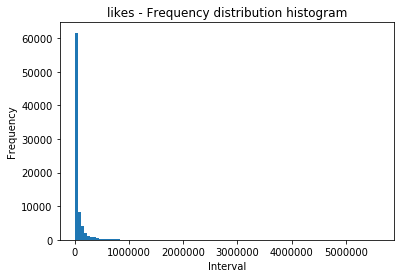

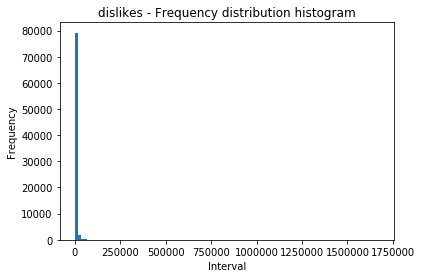

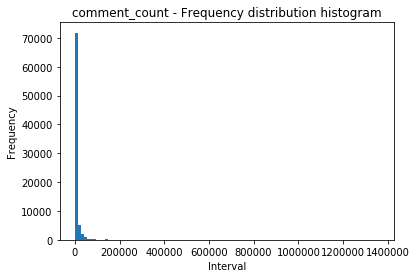

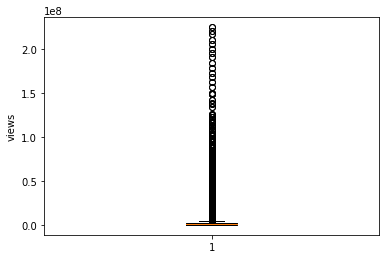

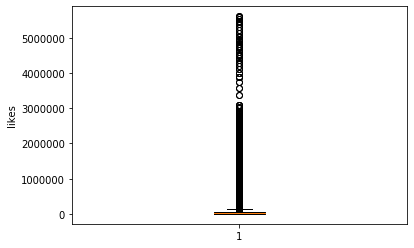

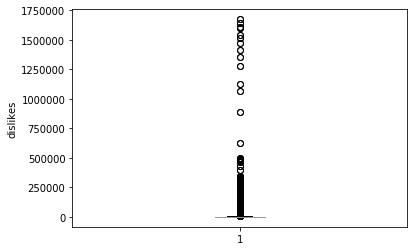

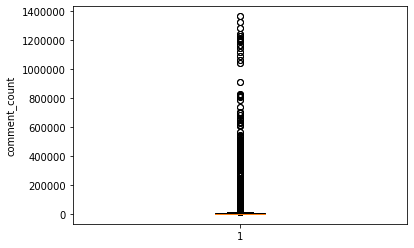

In [11]:
high_feq_process(pd.DataFrame(df, columns=["views", "likes", "dislikes", "comment_count"]))

              views         likes      dislikes  comment_count
count  8.189800e+04  8.189800e+04  8.189800e+04   8.189800e+04
mean   2.360785e+06  7.426670e+04  3.711401e+03   8.446804e+03
std    7.394069e+06  2.288839e+05  2.902953e+04   3.743026e+04
min    5.490000e+02  0.000000e+00  0.000000e+00   0.000000e+00
25%    2.423290e+05  5.424000e+03  2.020000e+02   6.140000e+02
50%    6.818610e+05  1.809100e+04  6.310000e+02   1.856000e+03
75%    1.823157e+06  5.541700e+04  1.938000e+03   5.755000e+03
max    2.252119e+08  5.613827e+06  1.674420e+06   1.361580e+06
{'col8': {'Max': 225211923.0, 'Min': 549.0, 'Mean': 2360784.6382573447, 'Mid': 681861.0, '25': 242329.0, '75': 1823157.0, 'Nan': 0}, 'col9': {'Max': 5613827.0, 'Min': 0.0, 'Mean': 74266.7024347359, 'Mid': 18091.0, '25': 5424.0, '75': 55417.0, 'Nan': 0}, 'col10': {'Max': 1674420.0, 'Min': 0.0, 'Mean': 3711.400888910596, 'Mid': 631.0, '25': 202.0, '75': 1938.0, 'Nan': 0}, 'col11': {'Max': 1361580.0, 'Min': 0.0, 'Mean': 8446.8036826

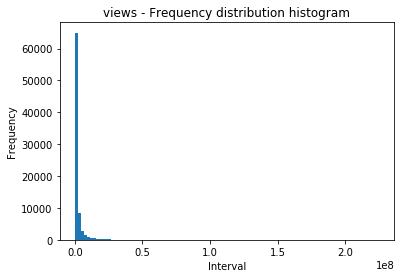

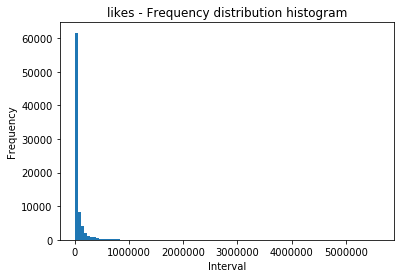

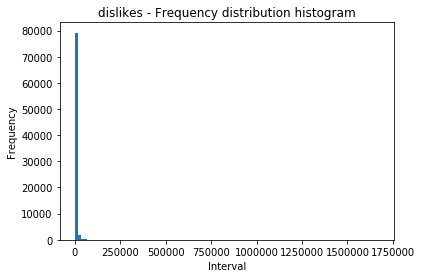

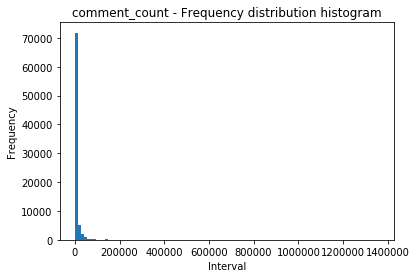

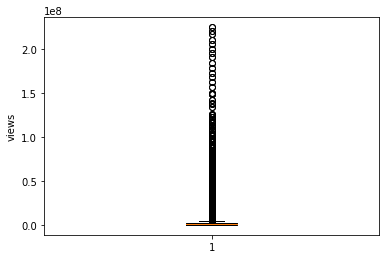

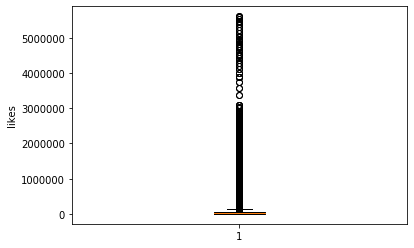

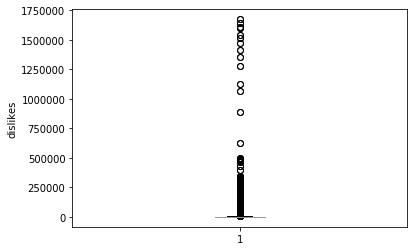

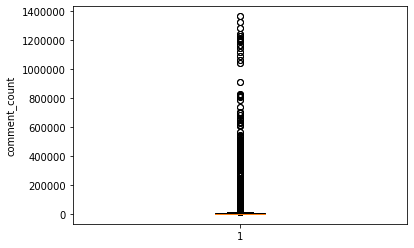

In [12]:
relation_process(pd.DataFrame(df, columns=["views", "likes", "dislikes", "comment_count"]))

              views         likes      dislikes  comment_count
count  8.189800e+04  8.189800e+04  8.189800e+04   8.189800e+04
mean   2.360785e+06  7.426670e+04  3.711401e+03   8.446804e+03
std    7.394069e+06  2.288839e+05  2.902953e+04   3.743026e+04
min    5.490000e+02  0.000000e+00  0.000000e+00   0.000000e+00
25%    2.423290e+05  5.424000e+03  2.020000e+02   6.140000e+02
50%    6.818610e+05  1.809100e+04  6.310000e+02   1.856000e+03
75%    1.823157e+06  5.541700e+04  1.938000e+03   5.755000e+03
max    2.252119e+08  5.613827e+06  1.674420e+06   1.361580e+06
{'col8': {'Max': 225211923.0, 'Min': 549.0, 'Mean': 2360784.6382573447, 'Mid': 681861.0, '25': 242329.0, '75': 1823157.0, 'Nan': 0}, 'col9': {'Max': 5613827.0, 'Min': 0.0, 'Mean': 74266.7024347359, 'Mid': 18091.0, '25': 5424.0, '75': 55417.0, 'Nan': 0}, 'col10': {'Max': 1674420.0, 'Min': 0.0, 'Mean': 3711.400888910596, 'Mid': 631.0, '25': 202.0, '75': 1938.0, 'Nan': 0}, 'col11': {'Max': 1361580.0, 'Min': 0.0, 'Mean': 8446.8036826

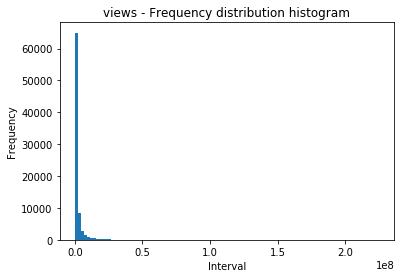

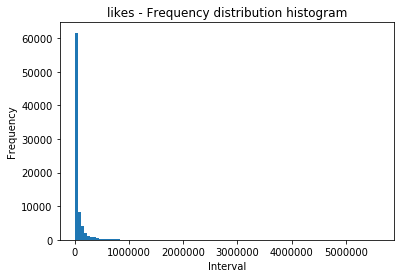

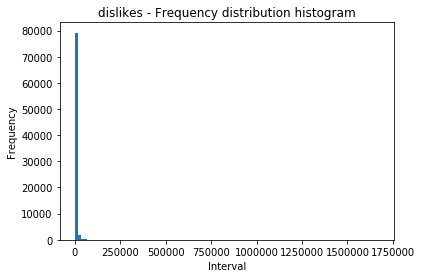

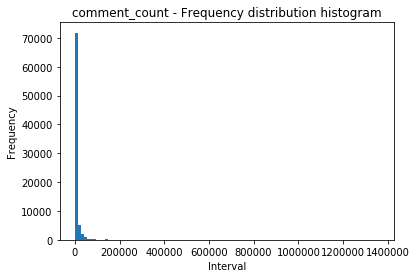

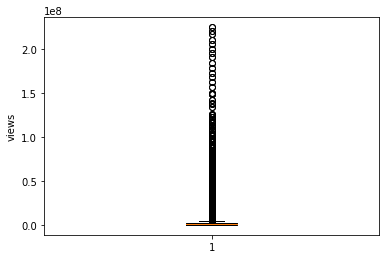

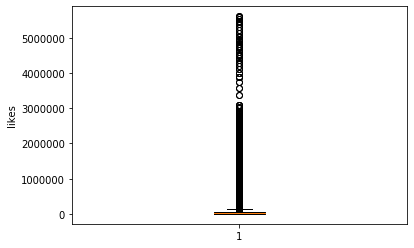

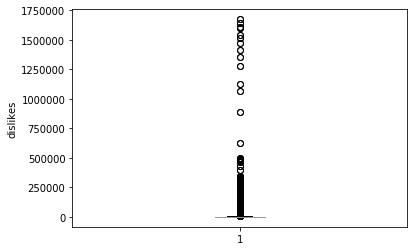

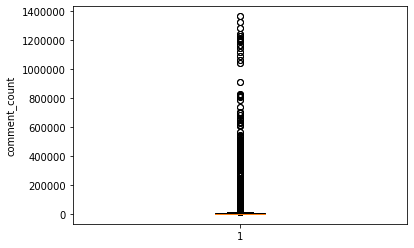

In [13]:
similarity_process(pd.DataFrame(df, columns=["views", "likes", "dislikes", "comment_count"]), k_num=3)

因为views, likes, dislikes, comment_count属性中无缺失值，所以通过4种策略处理后的数据集无变化。